## Observations and Insights 

#Pymacuticals Observations Summary:

Based on analysis of the below research findings, observations are as follows:
1. The study was conducted with almost 50/50 male to female of mice ratio.
2. Capomulin had the greatest number of observation time points compared to the other drug treatments.  
3. Capomulin treated mouse j119’s Tumor had reduced in volume by 15% over the course of treatment
4. In the Capomulin treated mice, there is a strong correlation between the weight of a mouse and their Tumor Volume.  The heavier the mouse, the greater the tumor volume.


array([[<AxesSubplot:title={'center':'Age_months'}>,
        <AxesSubplot:title={'center':'Weight (g)'}>],
       [<AxesSubplot:title={'center':'Timepoint'}>,
        <AxesSubplot:title={'center':'Tumor Volume (mm3)'}>],
       [<AxesSubplot:title={'center':'Metastatic Sites'}>,
        <AxesSubplot:>]], dtype=object)

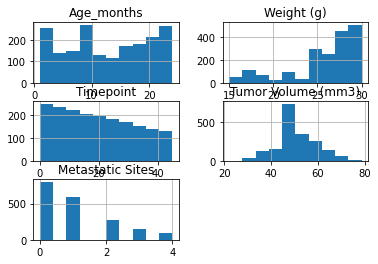

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_merge_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_merge_df.hist()


In [2]:
# Checking the number of mice.
Total_number_of_mice = mouse_data_merge_df["Mouse ID"].value_counts()
Total_number_of_mice


g989    13
i901    10
z581    10
l733    10
r701    10
        ..
t573     1
d133     1
u153     1
x226     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
print("Total Number of Mice is 249")

Total Number of Mice is 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_data_merge_df.loc[mouse_data_merge_df.duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_Data_Clean_df=mouse_data_merge_df.drop_duplicates(subset=("Mouse ID"), keep='first', inplace=False, ignore_index=False)
print("DataFrame with Duplicate Mouse ID Dropped")
Mouse_Data_Clean_df

DataFrame with Duplicate Mouse ID Dropped


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
Mouse_Data_Clean_df.describe()
Number_of_Mice = Mouse_Data_Clean_df["Mouse ID"].count()
f"Number of mice is {Number_of_Mice}"

'Number of mice is 249'

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Set the Values for Summary
Tumor_Volume_by_Regimen_df = mouse_data_merge_df.groupby("Drug Regimen")

Tumor_Vol_Mean = Tumor_Volume_by_Regimen_df["Tumor Volume (mm3)"].mean()
Tumor_Vol_Median = Tumor_Volume_by_Regimen_df["Tumor Volume (mm3)"].median()
Tumor_Vol_Var = Tumor_Volume_by_Regimen_df["Tumor Volume (mm3)"].var()
Tumor_Vol_Std = Tumor_Volume_by_Regimen_df["Tumor Volume (mm3)"].std()
Tumor_Vol_SEM = Tumor_Volume_by_Regimen_df["Tumor Volume (mm3)"].sem()

Tumor_Vol_Mean
Tumor_Vol_Median
Tumor_Vol_Var
Tumor_Vol_Std
Tumor_Vol_SEM

 #Regimen Summary
Regimen_Summary_df = pd.DataFrame({
                                    "Tumor_Volume_Mean":Tumor_Vol_Mean,
                                    "Tumor_Volume_Median":Tumor_Vol_Median, 
                                    "Tumor_Volume_Variance":Tumor_Vol_Var,
                                   "Tumor_Volume_Standard_Deviation":Tumor_Vol_Std,
                                   "Tumor_Volume_SEM":Tumor_Vol_SEM})  
Regimen_Summary_df


,Tumor_Volume_Mean,Tumor_Volume_Median,Tumor_Volume_Variance,Tumor_Volume_Standard_Deviation,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

Tumor_Volume_by_Regimen_df.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

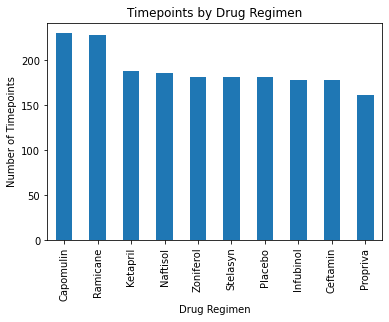

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data = mouse_data_merge_df["Drug Regimen"].value_counts()
bar_data.plot(kind="bar")
plt.title("Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

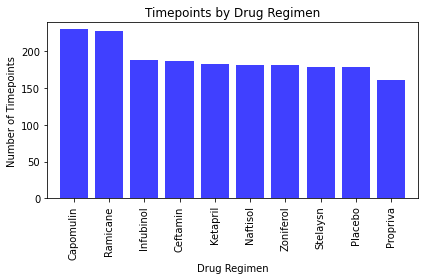

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Drug_Regimen_Values = len(mouse_data_merge_df["Drug Regimen"].unique())
Drug_Regimen_Values


Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin","Ketapril","Naftisol","Zoniferol","Stelaysn","Placebo","Propriva"]  
Count_by_Regimen = bar_data


plt.title("Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.xlim(-0.75, len(Drugs)-.25)
plt.ylim(0, max(Count_by_Regimen) + 9)

plt.bar(Drugs, Count_by_Regimen, facecolor="blue", alpha=0.75, align="center")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

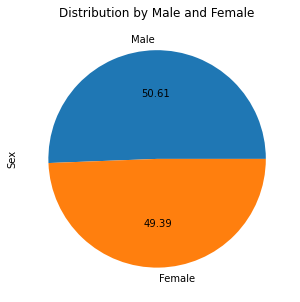

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = mouse_data_merge_df["Sex"].value_counts()
def autopct(pct): 
    return ('%.2f' % pct) 
pie_data.plot(kind="pie", figsize=(10,5), autopct=autopct)
plt.title("Distribution by Male and Female")
plt.show()


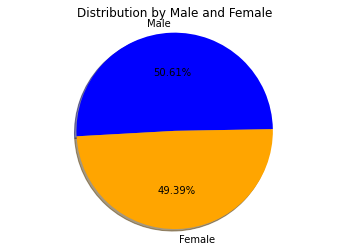

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex = ["Male", "Female"]
Count_by_Sex = pie_data
colors = ["blue", "orange"]

plt.title("Distribution by Male and Female")
plt.pie(Count_by_Sex, labels=Sex, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=1)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

most_recent_timepoint =  mouse_data_merge_df.sort_values(["Timepoint"], ascending=False)
most_recent_timepoint

Mouse_data_most_recent_df=most_recent_timepoint.drop_duplicates(subset=("Mouse ID"), keep='first', inplace=False, ignore_index=False)
Mouse_data_most_recent_df

Top_4_List_df = Mouse_data_most_recent_df[Mouse_data_most_recent_df['Drug Regimen'].isin(['Capomulin', 'Ramicane',"Infubinol", "Ceftamin"]) ]
Top_4_List_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
337,j119,Capomulin,Female,7,23,45,38.125164,1
272,d251,Ramicane,Female,8,19,45,37.311236,2
282,l897,Capomulin,Male,17,19,45,38.846876,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
1314,o813,Infubinol,Male,24,28,5,45.699331,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
        # Determine outliers using upper and lower bounds
quartiles = Top_4_List_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile is: 37.1877438025
The upper quartile is: 59.930261755
The interquartile range is: 22.742517952499995
The median is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


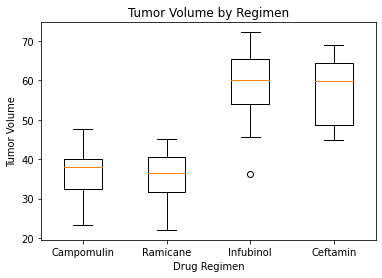

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_df = Top_4_List_df.where(Top_4_List_df["Drug Regimen"] == "Capomulin")
Capomulin_df = Capomulin_df[Capomulin_df["Mouse ID"].notnull()]
Ramicane_df = Top_4_List_df.where(Top_4_List_df["Drug Regimen"] == "Ramicane")
Ramicane_df = Ramicane_df[Ramicane_df["Mouse ID"].notnull()]
Infubinol_df = Top_4_List_df.where(Top_4_List_df["Drug Regimen"] == "Infubinol")
Infubinol_df = Infubinol_df[Infubinol_df["Mouse ID"].notnull()]
Ceftamin_df = Top_4_List_df.where(Top_4_List_df["Drug Regimen"] == "Ceftamin")
Ceftamin_df= Ceftamin_df[Ceftamin_df["Mouse ID"].notnull()]

Cap = (Capomulin_df['Tumor Volume (mm3)'])
Ram = (Ramicane_df['Tumor Volume (mm3)'])
Inf = (Infubinol_df['Tumor Volume (mm3)'])
Cef = (Ceftamin_df['Tumor Volume (mm3)'])


data = [Cap,Ram,Inf,Cef]
fig1, ax = plt.subplots()
ax.set_title("Tumor Volume by Regimen")
ax.set_ylabel('Tumor Volume')
ax.set_xlabel('Drug Regimen')
ax.boxplot(data)

plt.xticks([1, 2, 3, 4], ['Campomulin', 'Ramicane',"Infubinol","Ceftamin"])

plt.show()



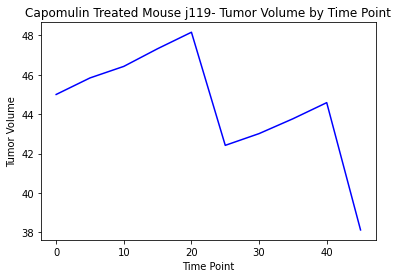

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Mouse_j119_df = mouse_data_merge_df.where(mouse_data_merge_df["Mouse ID"]== "j119")
Mouse_j119_df = Mouse_j119_df[Mouse_j119_df["Mouse ID"].notnull()]
Mouse_j119_df  

Timepoint_j119 = Mouse_j119_df["Timepoint"]
Tumor_Volume_j119 = Mouse_j119_df["Tumor Volume (mm3)"]
tumor_vol, = plt.plot(Timepoint_j119, Tumor_Volume_j119, color="blue",label="Tumor Volume by Time Point")


plt.title("Capomulin Treated Mouse j119- Tumor Volume by Time Point")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.show()

   Weight (g)  Age_months  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        15.0   16.000000  22.500000           36.182040          0.000000
1        17.0   14.769231  21.538462           37.214133          1.030769
2        19.0    7.666667  22.500000           41.182391          0.700000
3        20.0   23.000000  22.500000           39.141053          0.600000
4        21.0   17.458333  21.666667           42.088700          0.625000
5        22.0   15.500000  22.500000           43.288490          0.850000
6        23.0    6.478261  20.217391           43.341051          0.521739
7        24.0    1.000000  22.500000           44.805810          0.200000
8        25.0   14.857143  18.214286           44.062109          0.642857


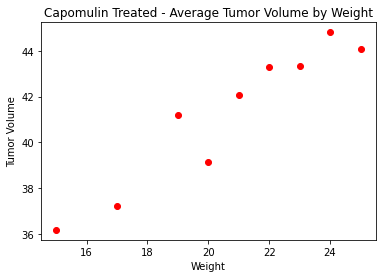

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = mouse_data_merge_df.where(mouse_data_merge_df["Drug Regimen"]== "Capomulin")
Capomulin_df = Capomulin_df[Capomulin_df["Drug Regimen"].notnull()]
Capomulin_df 

weight_group_df = Capomulin_df.groupby("Weight (g)")
weight_group_df

mean_df = weight_group_df.mean()
mean_df = mean_df.reset_index()
print(mean_df)

weight = mean_df["Weight (g)"]
avg_volume = mean_df["Tumor Volume (mm3)"]

plt.title("Capomulin Treated - Average Tumor Volume by Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")

plt.scatter(weight, avg_volume, marker="o", color="red")
plt.show()



## Correlation and Regression


In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight_cor = mean_df.iloc[:,0]
vol_cor = mean_df.iloc[:,3]
correlation = st.pearsonr(weight_cor,vol_cor)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.95


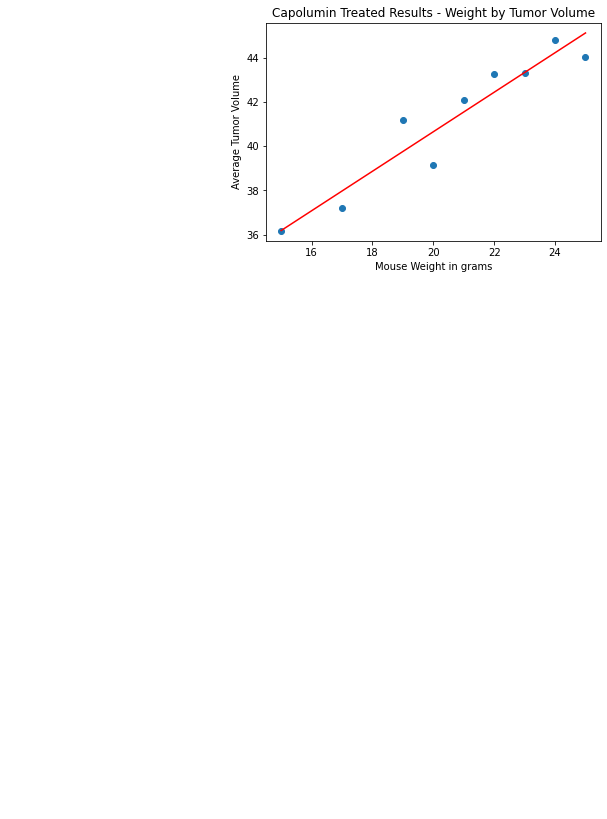

In [19]:
 # Add the linear regression equation and line to plot
x_values = mean_df['Weight (g)']
y_values = mean_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Capolumin Treated Results - Weight by Tumor Volume")
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume')
plt.show()